In [19]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
data = pd.read_csv('wdbc_data.csv')
data = data.drop(['id'], axis = 1)
data.diagnosis.replace(to_replace = dict(M=1, B=0), inplace = True)
data.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
461,1,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,...,36.04,31.37,251.20,4254.0,0.1357,0.42560,0.68330,0.26250,0.2641,0.07427
330,1,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.070410,0.1782,...,18.76,21.98,124.30,1070.0,0.1435,0.44780,0.49560,0.19810,0.3019,0.09124
338,0,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.017750,0.1890,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.10550,0.06499,0.2894,0.07664
475,0,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.030780,0.1705,...,14.09,19.35,93.22,605.8,0.1326,0.26100,0.34760,0.09783,0.3006,0.07802
289,0,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
161,1,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.096670,0.1741,...,22.03,17.81,146.60,1495.0,0.1124,0.20160,0.22640,0.17770,0.2443,0.06251
398,0,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,...,12.68,20.35,80.79,496.7,0.1120,0.18790,0.20790,0.05556,0.2590,0.09158
214,1,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.064620,0.2235,...,16.86,34.85,115.00,811.3,0.1559,0.40590,0.37440,0.17720,0.4724,0.10260
143,0,12.90,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.030880,0.1778,...,14.48,21.82,97.17,643.8,0.1312,0.25480,0.20900,0.10120,0.3549,0.08118
476,0,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.030580,0.1506,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.25120,0.13390,0.2534,0.07858


In [21]:
features = list(data.columns[1:])
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [22]:
def build_model(name_of_y_col,
               names_of_x_cols,
               dataset,
               *hyperparameters):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    fa_obj, X = do_factor_analysis(X, Y, *hyperparameters)
    
    x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    return {'fact_a_obj': fa_obj,
           'transform_x': X,
           'Accuracy': acc,
           'Precision': pre,
           'Recall': rec,
           'Confusion Matrix': model_crosstab
           } 

In [23]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test', key)
        print()
        print("Accuracy Score:", result_dict[key]['Accuracy'])
        print("Precision Score:", result_dict[key]['Precision'])
        print("Recall Score:", result_dict[key]['Recall'])
        print()

In [24]:
def visualize_results(result_dict):
    
    n_components = list(range(0, 30))
    acc = [result_dict[key]['Accuracy'] for key in result_dict]
    pre = [result_dict[key]['Precision'] for key in result_dict]
    rec = [result_dict[key]['Recall'] for key in result_dict]
    
    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc, label = 'Accuracy')
    plt.plot(n_components, pre, label = 'Precision')
    plt.plot(n_components, rec, label = 'Recall')
    
    pylab.ylim([0.7, 1.2])
    
    plt.xlabel('n_components')
    plt.ylabel('Score')
    
    plt.legend()

In [25]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    
    return model

In [26]:
from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):
    
    fact_a = FactorAnalysis(n_components = n, random_state = 10, max_iter = 10000)
    x_new = fact_a.fit_transform(x, y)
    
    return fact_a, pd.DataFrame(x_new)

In [27]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model('diagnosis',
                                                         features,
                                                         data,
                                                         i)

In [28]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.9064327485380117
Precision Score: 0.9622641509433962
Recall Score: 0.7846153846153846

Test n_components - 2

Accuracy Score: 0.8888888888888888
Precision Score: 0.8823529411764706
Recall Score: 0.7758620689655172

Test n_components - 3

Accuracy Score: 0.9181286549707602
Precision Score: 0.9807692307692307
Recall Score: 0.796875

Test n_components - 4

Accuracy Score: 0.9590643274853801
Precision Score: 0.9672131147540983
Recall Score: 0.921875

Test n_components - 5

Accuracy Score: 0.9707602339181286
Precision Score: 1.0
Recall Score: 0.9152542372881356

Test n_components - 6

Accuracy Score: 0.9590643274853801
Precision Score: 0.9583333333333334
Recall Score: 0.9452054794520548

Test n_components - 7

Accuracy Score: 0.9532163742690059
Precision Score: 1.0
Recall Score: 0.873015873015873

Test n_components - 8

Accuracy Score: 0.9590643274853801
Precision Score: 0.9814814814814815
Recall Score: 0.8983050847457628

Test n_components - 9

Accu

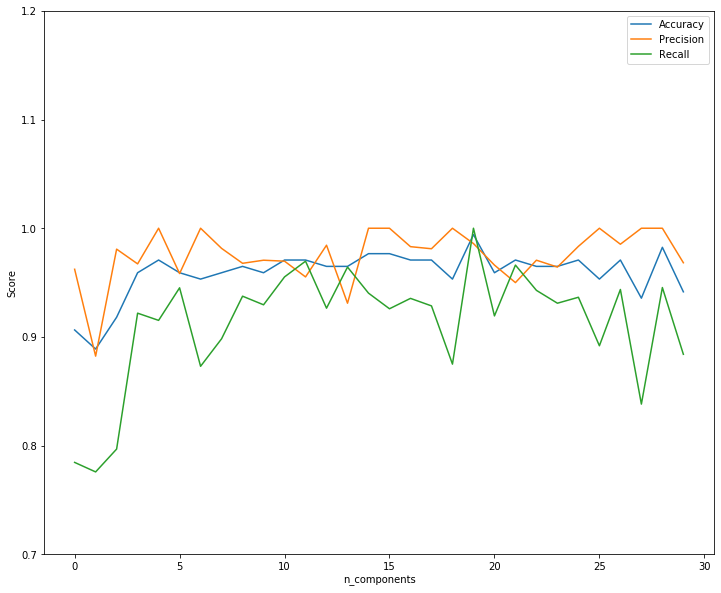

In [29]:
visualize_results(result_dict)